In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 

from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences


Using TensorFlow backend.


In [2]:
####Hyperparameters####
VOCAB_SIZE = 30000
EMBEDDING_DIM = 16
EPOCHS = 15
MAX_LEN = 32
TRUNC_TYPE = 'post'
PADD_TYPE = 'post'
UNK_TOK = '<UNK>'
TRAINING_SIZE = 1000

print('\nHyperparameters Done\n')


Hyperparameters Done



In [3]:
dataset = pd.read_csv('Spam dataset.csv')
print('dataset: ')

print(dataset.head(), '\n')
print('Null values in the dataset: ')

print(dataset.isnull(), '\n')
print('Sum of Null values in each column: ')

print(dataset.isnull().sum(), '\n')

dataset["Category"] = [1 if each == "spam" else 0 for each in dataset["Category"]]

print('dataset: ')
print(dataset.head(), '\n')

dataset: 
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro... 

Null values in the dataset: 
      Category  Message
0        False    False
1        False    False
2        False    False
3        False    False
4        False    False
...        ...      ...
5567     False    False
5568     False    False
5569     False    False
5570     False    False
5571     False    False

[5572 rows x 2 columns] 

Sum of Null values in each column: 
Category    0
Message     0
dtype: int64 

dataset: 
   Category                                            Message
0         0  Go until jurong point, crazy.. Available only ...
1         0                      Ok lar... Joking wif u o

In [4]:
X = dataset.iloc[:, 1].values
X = X.reshape(-1, 1)
print('Type of X:', type(X))
print('shape of X: ', X.shape)
#print(X)

Y = dataset.iloc[:, 0].values
y = Y.reshape(-1, 1)
print('Type of Y; ', type(Y))
print('shape of Y: ', y.shape)
#print(y)
X = X.tolist()
y = y.tolist()
print('Length of X: ', len(X), '\n')

Type of X: <class 'numpy.ndarray'>
shape of X:  (5572, 1)
Type of Y;  <class 'numpy.ndarray'>
shape of Y:  (5572, 1)
Length of X:  5572 



In [5]:
####Train test Split####
Training_Sentences = X[TRAINING_SIZE:]
Training_Labels = y[TRAINING_SIZE:]
print('Length of training samples ', len(Training_Sentences), '\n')

Testing_Sentences = X[0: TRAINING_SIZE]
Testing_Lables = y[0:TRAINING_SIZE]
print('Length of testing samples', len(Testing_Sentences), '\n')

Length of training samples  4572 

Length of testing samples 1000 



In [6]:
####TOKENIZING THE WORDS#####
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=UNK_TOK)
tokenizer.fit_on_texts(Training_Sentences)

word_index = tokenizer.word_index

#print(word_index, '\n \n \n')

Training_Sequences = tokenizer.texts_to_sequences(Training_Sentences)
Training_pad = pad_sequences(Training_Sequences, maxlen=MAX_LEN, padding=PADD_TYPE, truncating=TRUNC_TYPE)

Testing_Sequences = tokenizer.texts_to_sequences(Testing_Sentences)
Testing_pad = pad_sequences(Testing_Sequences, maxlen=MAX_LEN, padding=PADD_TYPE, truncating=TRUNC_TYPE)

In [7]:
#####BUILDING THE MODEL############

model = tf.keras.Sequential()
print('#####MODEL INSTANCE Done#####')
model.add(tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(24, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

print('#########################')
print(model.summary())
print('#########################')

#####MODEL INSTANCE Done#####
#########################
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            480000    
_________________________________________________________________
bidirectional (Bidirectional (None, 32, 128)           41472     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 24)                3096      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 623,409
Trainable params: 623,409
Non-trainable para

In [8]:
########Converting to numpy array##########
Training_Sequences_padded = np.asarray(Training_pad)
Testing_Sequences_padded = np.asarray(Testing_pad)
Training_Labels = np.asarray(Training_Labels)
Testing_Lables = np.asarray(Testing_Lables)

In [9]:
######Training THE MODEL###################
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(Training_Sequences_padded, Training_Labels, validation_data=(Testing_Sequences_padded, Testing_Lables), epochs=EPOCHS)

Epoch 1/15
143/143 [==============================] - 12s 81ms/step - loss: 0.4072 - accuracy: 0.8646 - val_loss: 0.4278 - val_accuracy: 0.8480
Epoch 2/15
143/143 [==============================] - 9s 62ms/step - loss: 0.3865 - accuracy: 0.8699 - val_loss: 0.4259 - val_accuracy: 0.8480
Epoch 3/15
143/143 [==============================] - 8s 57ms/step - loss: 0.1372 - accuracy: 0.9543 - val_loss: 0.5104 - val_accuracy: 0.8820
Epoch 4/15
143/143 [==============================] - 8s 59ms/step - loss: 0.0094 - accuracy: 0.9987 - val_loss: 0.7567 - val_accuracy: 0.8820
Epoch 5/15
143/143 [==============================] - 9s 62ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.8800 - val_accuracy: 0.8820
Epoch 6/15
143/143 [==============================] - 8s 58ms/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.9663 - val_accuracy: 0.8820
Epoch 7/15
143/143 [==============================] - 8s 58ms/step - loss: 0.0131 - accuracy: 0.9969 - val_loss: 3.8662 - val_accuracy: 0.230

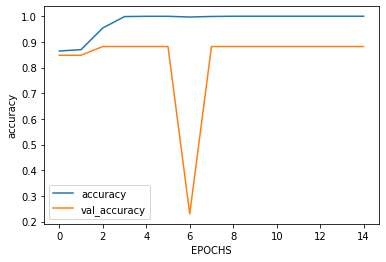

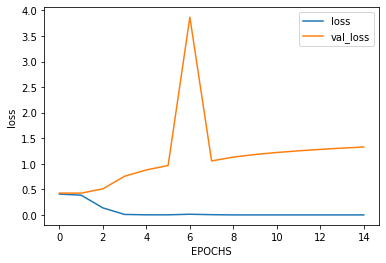

######DONE########


In [43]:
def Plot(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("EPOCHS")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string ])
    plt.savefig(string + '.png')
    plt.show()
    
    
Plot(history, "accuracy")
Plot(history, "loss")


print("######DONE########")


In [16]:
text = 'WINNER. You won this exciting lottery!!!'
print(text)
Test = tokenizer.texts_to_sequences([text])[0]
Test_padded = pad_sequences([Test], maxlen=MAX_LEN, padding=PADD_TYPE, truncating=TRUNC_TYPE)
Test_padded = np.asarray(Test_padded)
print('Done')
print(Test_padded.shape)

ypred = model.predict(Test_padded)

print('output class: ', ypred)

WINNER. You won this exciting lottery!!!
Done
(1, 32)
output class:  [[0.9994037]]


In [19]:
y_pred = model.predict_classes(Testing_Sequences_padded)
print(y_pred.shape)

(1000, 1)


In [20]:
print(Testing_Lables.shape)

(1000, 1)


In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Testing_Lables, y_pred))

0.882
